### Problem Statment:
Leveraging the transactional data collected by the Walmart Inc., of customers who purchased products from the Walmart Stores during Black Friday to analyze the customer purchase behavior against the customer’s gender and the various other factors to help the business make better decisions  

In [1]:
#importing libraries 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm

In [2]:
#loding dataset
df = pd.read_csv("C:/Users/USER/Downloads/walmart_data.csv")

In [3]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [4]:
#Shape of dataset
df.shape

(550068, 10)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [6]:
#Number of unique values in each column
df.nunique()

User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category                 20
Purchase                      18105
dtype: int64

#### Occupation, marital status and product category have limited unique values. So we can change the data type to category

In [7]:
#Converting the categorical columns to object type
df[['Occupation','Marital_Status','Product_Category']]=df[['Occupation','Marital_Status','Product_Category']].astype('object')

In [8]:
#Confirming the data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  object
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  object
 8   Product_Category            550068 non-null  object
 9   Purchase                    550068 non-null  int64 
dtypes: int64(2), object(8)
memory usage: 42.0+ MB


In [9]:
df['Marital_Status'].unique()

array([0, 1], dtype=object)

#### Martial status only have two unique values 0 and 1. So we can replace 0 with single and 1 with married

In [10]:
#Replacing 0 with single and 1 with married
df['Marital_Status'] = df['Marital_Status'].apply(lambda x: 'Single' if x == 0 else 'Married')

In [11]:
df['Marital_Status'].unique()

array(['Single', 'Married'], dtype=object)

In [12]:
#Checking for missing values
df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

#### No missing values are present in our dataset

In [13]:
df.describe(include= 'all')

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068,550068,550068,550068.0,550068,550068,550068,550068.0,550068.000000
unique,NaN,3631,2,7,21.0,3,5,2,20.0,NaN
top,NaN,P00265242,M,26-35,4.0,B,1,Single,5.0,NaN
freq,NaN,1880,414259,219587,72308.0,231173,193821,324731,150933.0,NaN
mean,1.003029e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9263.968713
std,1.727592e+03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5023.065394
min,1.000001e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.000000
25%,1.001516e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5823.000000
50%,1.003077e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8047.000000
75%,1.004478e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12054.000000


#### In purchase column, there is significant difference between mean and median so it can contain outliers

In [14]:
df['User_ID'].nunique()

5891

In [15]:
df['Product_ID'].nunique()

3631

In [16]:
# Checking the proportions for each categorical column
cat_cols = ['Gender', 'Age', 'Occupation', 'City_Category', 'Stay_In_Current_City_Years', 'Marital_Status', 
            'Product_Category']
for i in cat_cols:
    print(f'For {i} the proportion is:')
    print(df[i].value_counts(normalize = True)*100)
    print('\n')

For Gender the proportion is:
M    75.310507
F    24.689493
Name: Gender, dtype: float64


For Age the proportion is:
26-35    39.919974
36-45    19.999891
18-25    18.117760
46-50     8.308246
51-55     6.999316
55+       3.909335
0-17      2.745479
Name: Age, dtype: float64


For Occupation the proportion is:
4     13.145284
0     12.659889
7     10.750125
1      8.621843
17     7.279645
20     6.101427
12     5.668208
14     4.964659
2      4.833584
16     4.612339
6      3.700452
3      3.208694
10     2.350618
5      2.213726
15     2.211545
11     2.106285
19     1.538173
13     1.404917
18     1.203851
9      1.143677
8      0.281056
Name: Occupation, dtype: float64


For City_Category the proportion is:
B    42.026259
C    31.118880
A    26.854862
Name: City_Category, dtype: float64


For Stay_In_Current_City_Years the proportion is:
1     35.235825
2     18.513711
3     17.322404
4+    15.402823
0     13.525237
Name: Stay_In_Current_City_Years, dtype: float64


For Marital_Sta

#### We can see that 75% users are male. 40% users are between the age of 26-35 years. And, 59% users are single.

## Outlier Detection

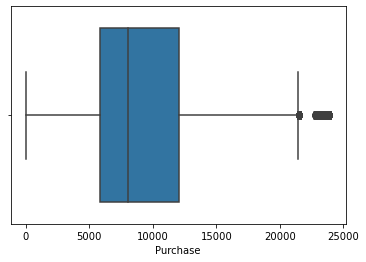

In [17]:
sns.boxplot(data = df, x='Purchase')
plt.show()

#### We can see that purchase is having outliers

### Univariate Analysis

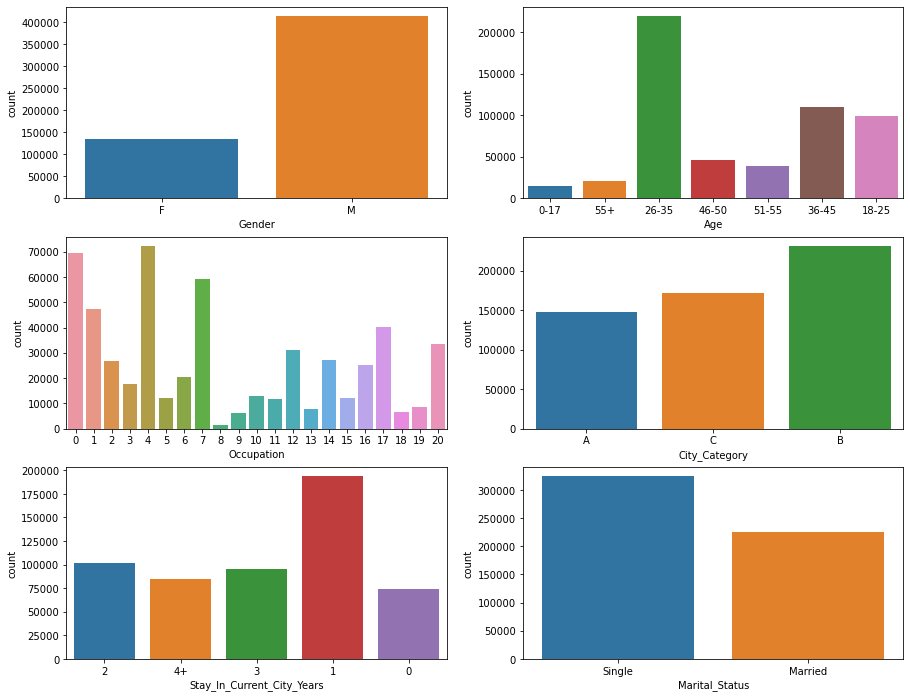

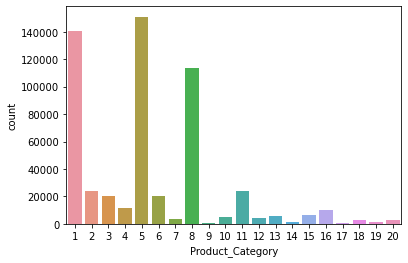

In [18]:
#Analysis of categorical columns by countplot
Fig, Axes = plt.subplots(nrows=3, ncols=2, figsize=(15,12))
k = 0
for i in range(3):
    for j in range(2):
        sns.countplot(data=df, x= cat_cols[k], ax=Axes[i,j])
        k += 1
plt.show()
sns.countplot(data = df, x = 'Product_Category')
plt.show()

#### 1. Most users are male, single and age between 26-35 years
#### 2. Most users resides in city of category B
#### 3. There are 21 different occupation and 20 different products
#### 4. Product category 1,5 and 8 are most popular among users

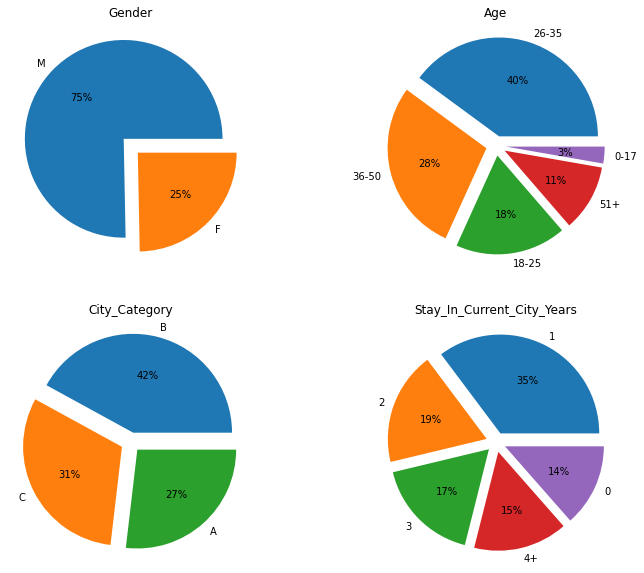

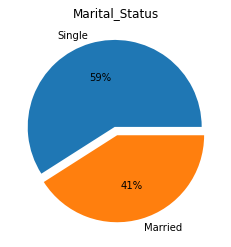

In [72]:
#Proportion analysis by pie chart of categorical columns
Fig, Axes = plt.subplots(nrows=2, ncols=2, figsize=(12,10))
cols = ['Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years', 'Marital_Status']
k = 0
for i in range(4):
    plt.subplot(2, 2, i+1)
    data = df[cols[i]].value_counts(normalize=True)*100
    explode = [0.1]*len(data.index)
    plt.gca().title.set_text(cols[i])
    plt.pie(x=data.values, labels=data.index, autopct='%.0f%%', explode= explode)
    k += 1
plt.show()
data = df[cols[-1]].value_counts(normalize=True)*100
plt.gca().title.set_text(cols[-1])
explode = [0.05]*len(data.index)
plt.pie(x=data.values, labels=data.index, autopct='%.0f%%', explode= explode)
plt.show()

#### In the given data out of all users, 75% are male, 40% are betweeen the age 26-35 years, 42% are living in city category B, 35% are living in their current city for one year, and 59% are single

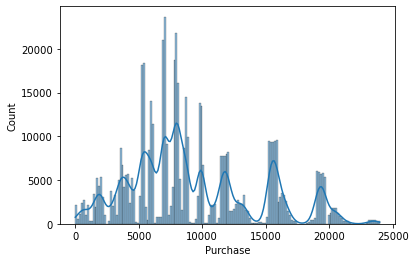

In [20]:
#Analysis of continuous variable 
sns.histplot(data = df, x = 'Purchase', kde = True)
plt.show()

#### Most of the purchase amounts lie between 5000 to 10000

### Bivariate, Multivariate Analysis and Correlation

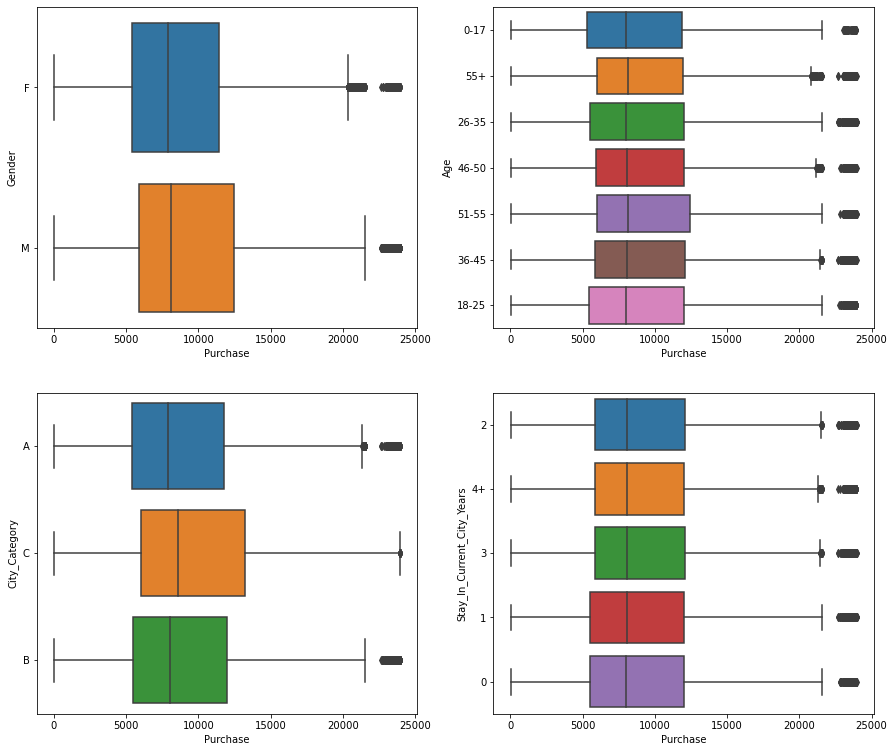

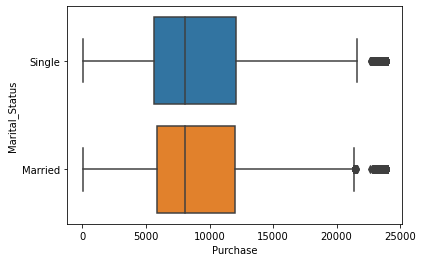

In [21]:
#Distribution of categorical columns with purchase using boxplot
Fig, Axes = plt.subplots(nrows=2, ncols=2, figsize=(15,13))
k = 0
col = ['Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years']
for i in range(2):
    for j in range(2):
        sns.boxplot(data=df, x = 'Purchase', y= col[k], ax=Axes[i,j])
        k += 1
plt.show()
sns.boxplot(data=df, x = 'Purchase', y= 'Marital_Status')
plt.show()

In [22]:
#Correlation between the columns of dataframe

#Creating a copy of the dataframe -
df_copy=pd.read_csv("C:/Users/USER/Downloads/walmart_data.csv")

df_copy['Gender'].replace(['M', 'F'], [1, 0], inplace=True)

# Replacing age bins with avg of that bin
df_copy['Age'].replace(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'], 
                       [8.5,55,30.5,48,52.5,40.5,21.5], inplace=True)

df_copy['Stay_In_Current_City_Years'].replace(['0','1','2','3','4+'],[0,1,2,3,4], inplace = True)
df_copy['City_Category'].replace(['A','B','C'],[0,1,2], inplace =True)
df_copy['Product_ID'] = df_copy['Product_ID'].apply(lambda x: int(x[1:]))
df_copy.astype('int')
df_copy.corr()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
User_ID,1.000000,-0.017619,-0.033474,0.040524,-0.023971,0.022859,-0.030737,0.020443,0.003825,0.004716
Product_ID,-0.017619,1.000000,0.021084,0.028628,0.009344,0.010162,-0.003162,0.013194,0.090193,-0.103961
Gender,-0.033474,0.021084,1.000000,-0.002577,0.117291,-0.004515,0.014660,-0.011603,-0.045594,0.060346
Age,0.040524,0.028628,-0.002577,1.000000,0.091147,0.106568,-0.003508,0.317494,0.059831,0.016459
Occupation,-0.023971,0.009344,0.117291,0.091147,1.000000,0.034479,0.030005,0.024280,-0.007618,0.020833
City_Category,0.022859,0.010162,-0.004515,0.106568,0.034479,1.000000,0.019946,0.039790,-0.014364,0.061914
Stay_In_Current_City_Years,-0.030737,-0.003162,0.014660,-0.003508,0.030005,0.019946,1.000000,-0.012819,-0.004213,0.005422
Marital_Status,0.020443,0.013194,-0.011603,0.317494,0.024280,0.039790,-0.012819,1.000000,0.019888,-0.000463
Product_Category,0.003825,0.090193,-0.045594,0.059831,-0.007618,-0.014364,-0.004213,0.019888,1.000000,-0.343703
Purchase,0.004716,-0.103961,0.060346,0.016459,0.020833,0.061914,0.005422,-0.000463,-0.343703,1.000000


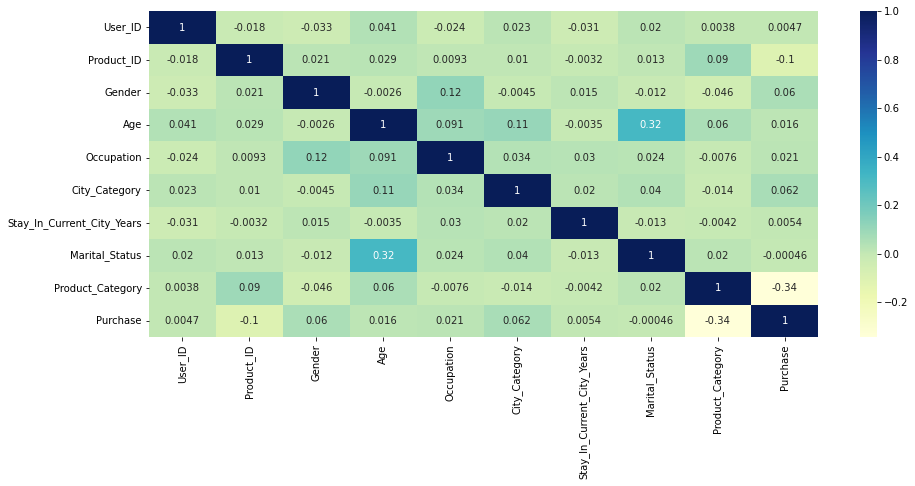

In [23]:
# Correlation Plot above as a Heatmap -
plt.figure(figsize=(15,6))
sns.heatmap(df_copy.corr(), cmap="YlGnBu", annot=True)
plt.show()

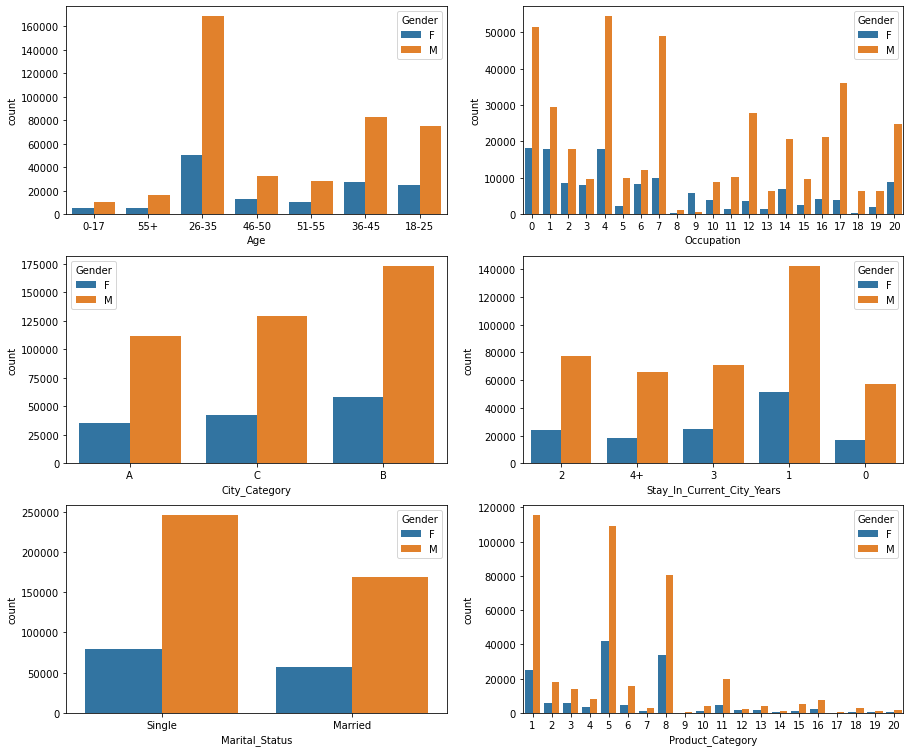

In [24]:
Fig, Axes = plt.subplots(nrows=3, ncols=2, figsize=(15,13))
k = 1
for i in range(3):
    for j in range(2):
        sns.countplot(data=df, x = cat_cols[k], hue='Gender', ax = Axes[i,j])
        k +=1    
plt.show()

#### 1) We can see that there are more number of male customers in every age group
#### 2) Most male users are having 0, 4, 7 occupation while most female users are having 0,1,4 occupation
#### 3) Most male and females users reside in City_category B
#### 4) Most of the male and female users have been living in their current city for last 1 year
#### 5) Most of the male users are singles
#### 6) Product category 1,5 and 8 are more popular in both male and female users

### 

### Visual analysis of Average Amount per Customer with categorical variables

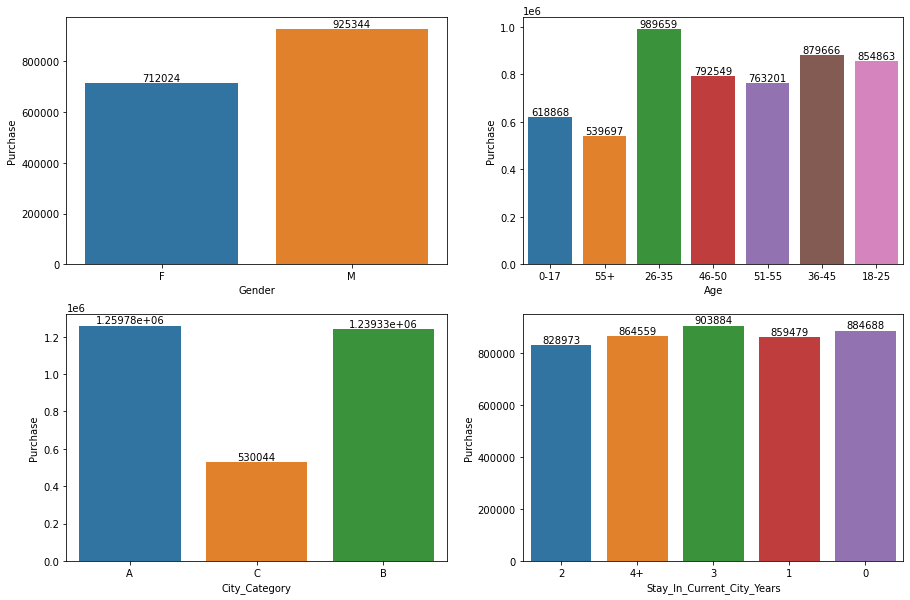

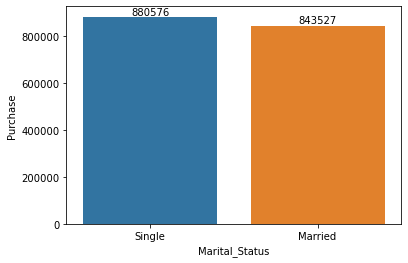

In [25]:
# Creating dataframe with unique user ids i.e for each customer
df_group = df.groupby(['User_ID','Gender', 'Age', 'Occupation','City_Category', 'Stay_In_Current_City_Years', 
                       'Marital_Status']).sum()
df_group= df_group.reset_index()
# Generating barplot for categorical columns vs avg purchase amount per customer
Fig, Axes = plt.subplots(nrows=2, ncols=2, figsize=(15,10))
col = ['Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years']
k = 0
for i in range(2):
    for j in range(2):
        ax = sns.barplot(data=df_group, x = col[k], y= 'Purchase', ax = Axes[i,j], ci= None)
        ax.bar_label(ax.containers[0])
        k +=1 
plt.show()
ax = sns.barplot(data=df_group, x = 'Marital_Status', y= 'Purchase', ci= None)
ax.bar_label(ax.containers[0])
plt.show()

##### 1) Average amount per customer spend by males(925344) is more than females(712024)
##### 2) Users between the age of 26-35 years spend more than other age groups
##### 3) Customers living in city_category A spend more money than others and second closer is city_category B
##### 4) Customers who are living in their current city for 3 years spend more than others
##### 5) Single customers spend more than married customers

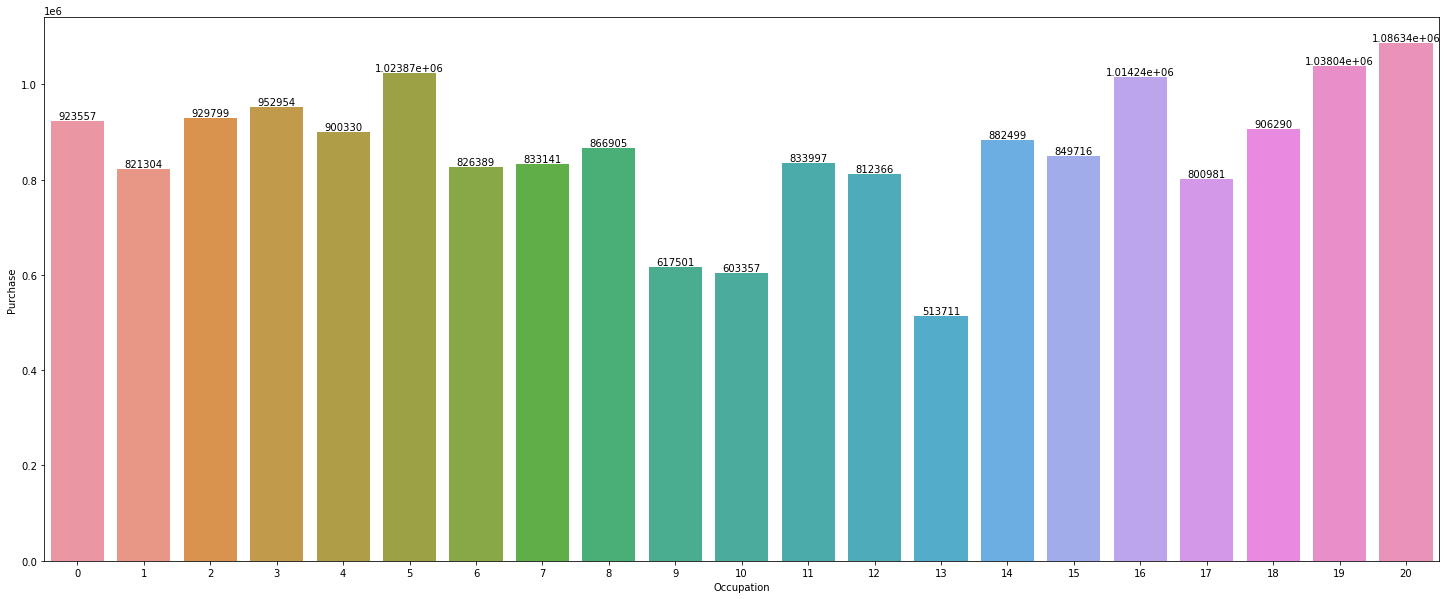

In [26]:
plt.figure(figsize = (25,10))
ax = sns.barplot(data=df_group, x = 'Occupation', y= 'Purchase', ci= None)
ax.bar_label(ax.containers[0])
plt.show()

#### Customers with occupation 20 spend more than others

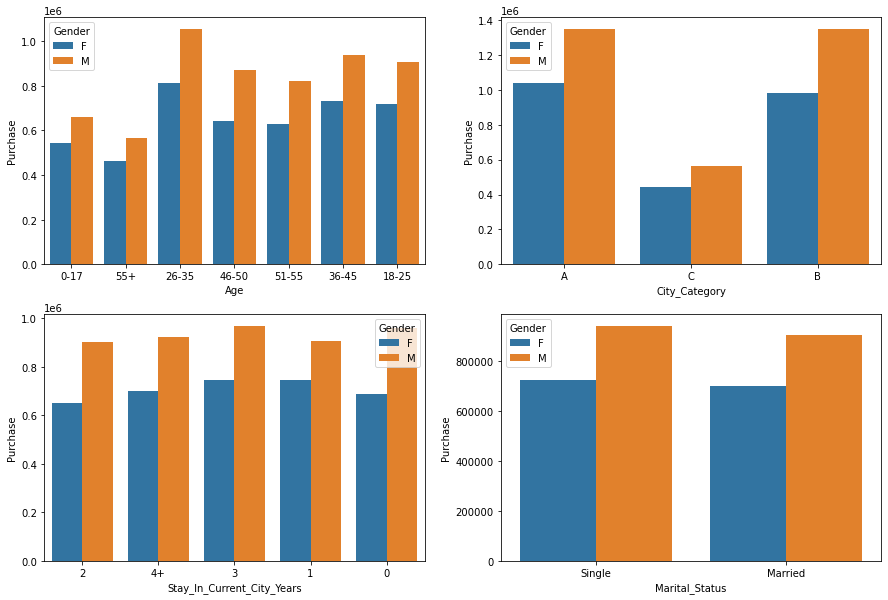

In [27]:
Fig, Axes = plt.subplots(nrows=2, ncols=2, figsize=(15,10))
col = ['Age', 'City_Category', 'Stay_In_Current_City_Years','Marital_Status' ]
k = 0
for i in range(2):
    for j in range(2):
        ax = sns.barplot(data=df_group, x = col[k], y= 'Purchase', hue = 'Gender', ax = Axes[i,j], ci= None)
        k +=1
plt.show()

##### Male and female customers between the age 26-35 years spend more than other age groups
##### Female and male customers who are single spend more than married

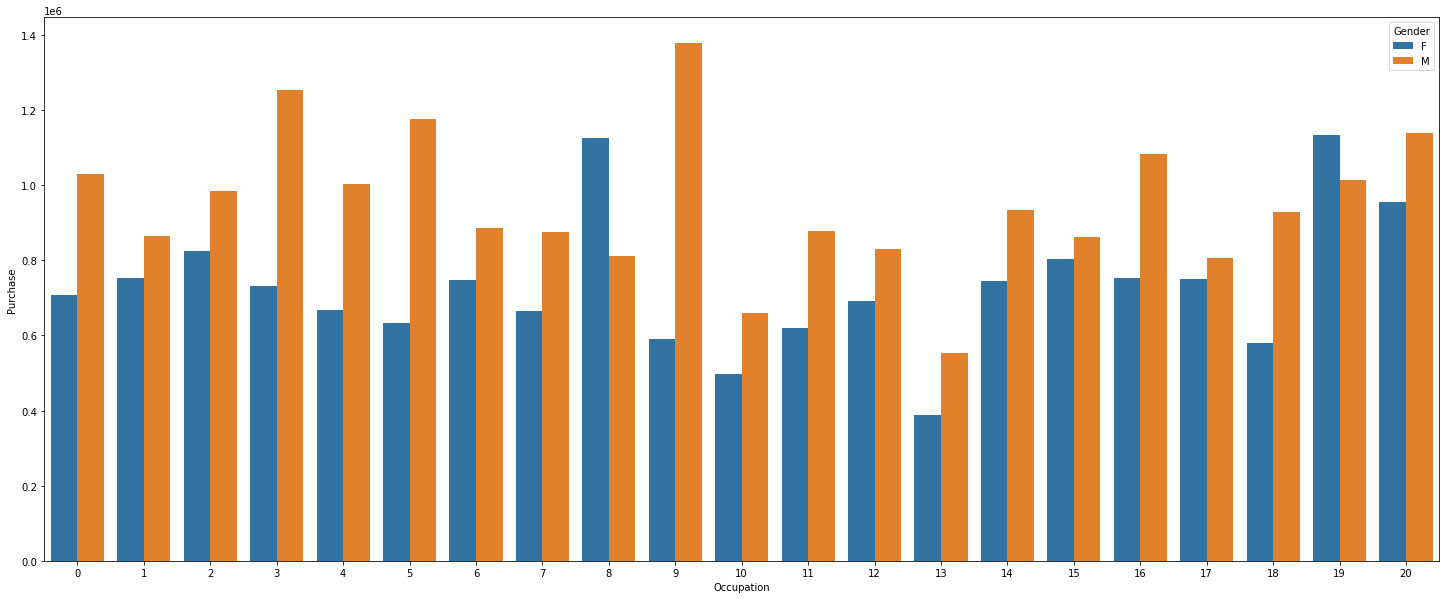

In [28]:
plt.figure(figsize = (25,10))
sns.barplot(data=df_group, x = 'Occupation', y= 'Purchase', hue = 'Gender', ci= None)
plt.show()

#### Amount spend by male customers with occupation 9 is higher than others
#### Amount spend by female customers with occupation 8 and 19 is higher than others 

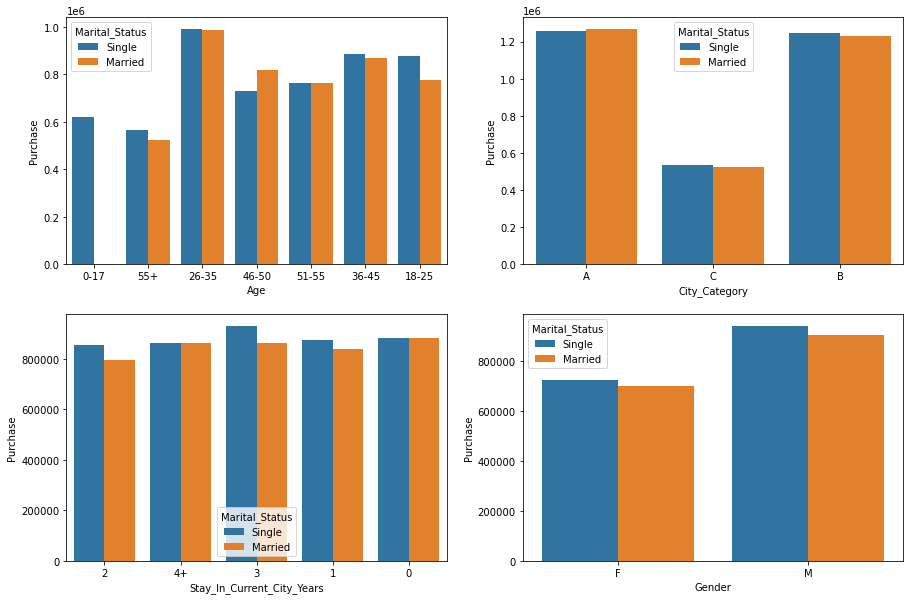

In [29]:
Fig, Axes = plt.subplots(nrows=2, ncols=2, figsize=(15,10))
col = ['Age', 'City_Category', 'Stay_In_Current_City_Years','Gender' ]
k = 0
for i in range(2):
    for j in range(2):
        ax = sns.barplot(data=df_group, x = col[k], y= 'Purchase', hue = 'Marital_Status', ax = Axes[i,j], ci= None)
        k +=1
plt.show()

##### There is no purchase amount for married customers between the age of 0-17 years which is obvious

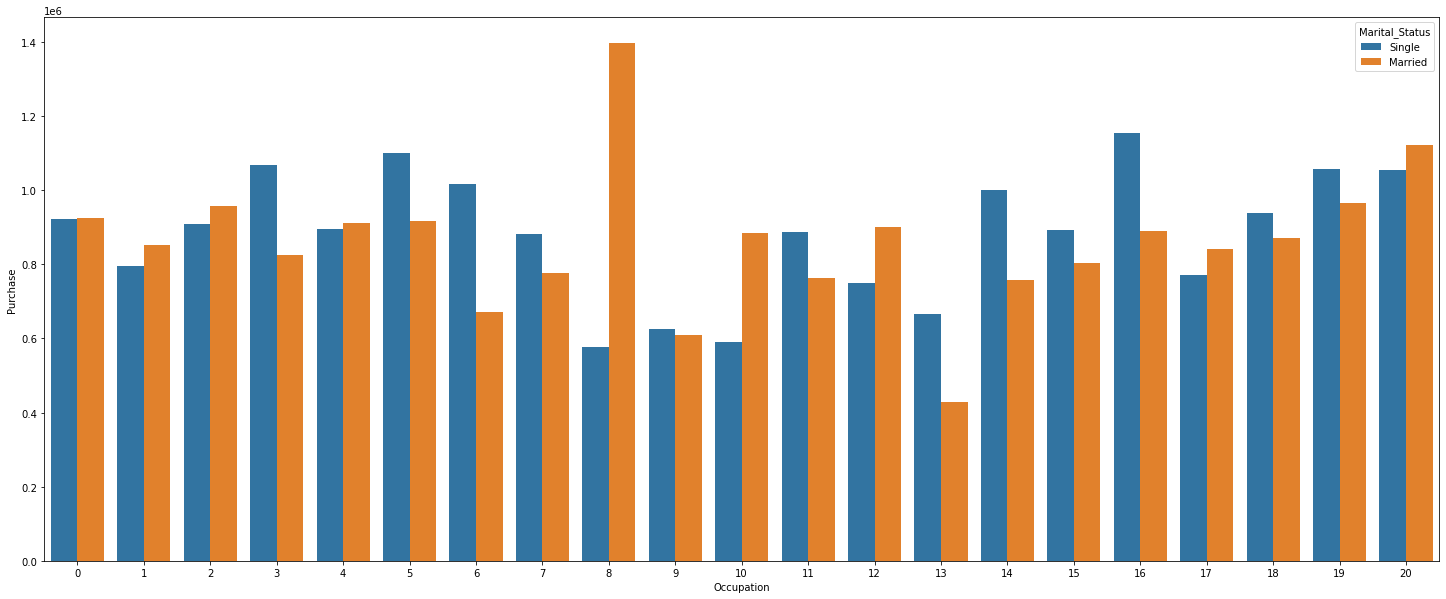

In [30]:
plt.figure(figsize = (25,10))
sns.barplot(data=df_group, x = 'Occupation', y= 'Purchase', hue = 'Marital_Status', ci= None)
plt.show()

#### Married customers having occupation 8, spend higher amount  than others while Single customers having occupation 16 spend highest amount

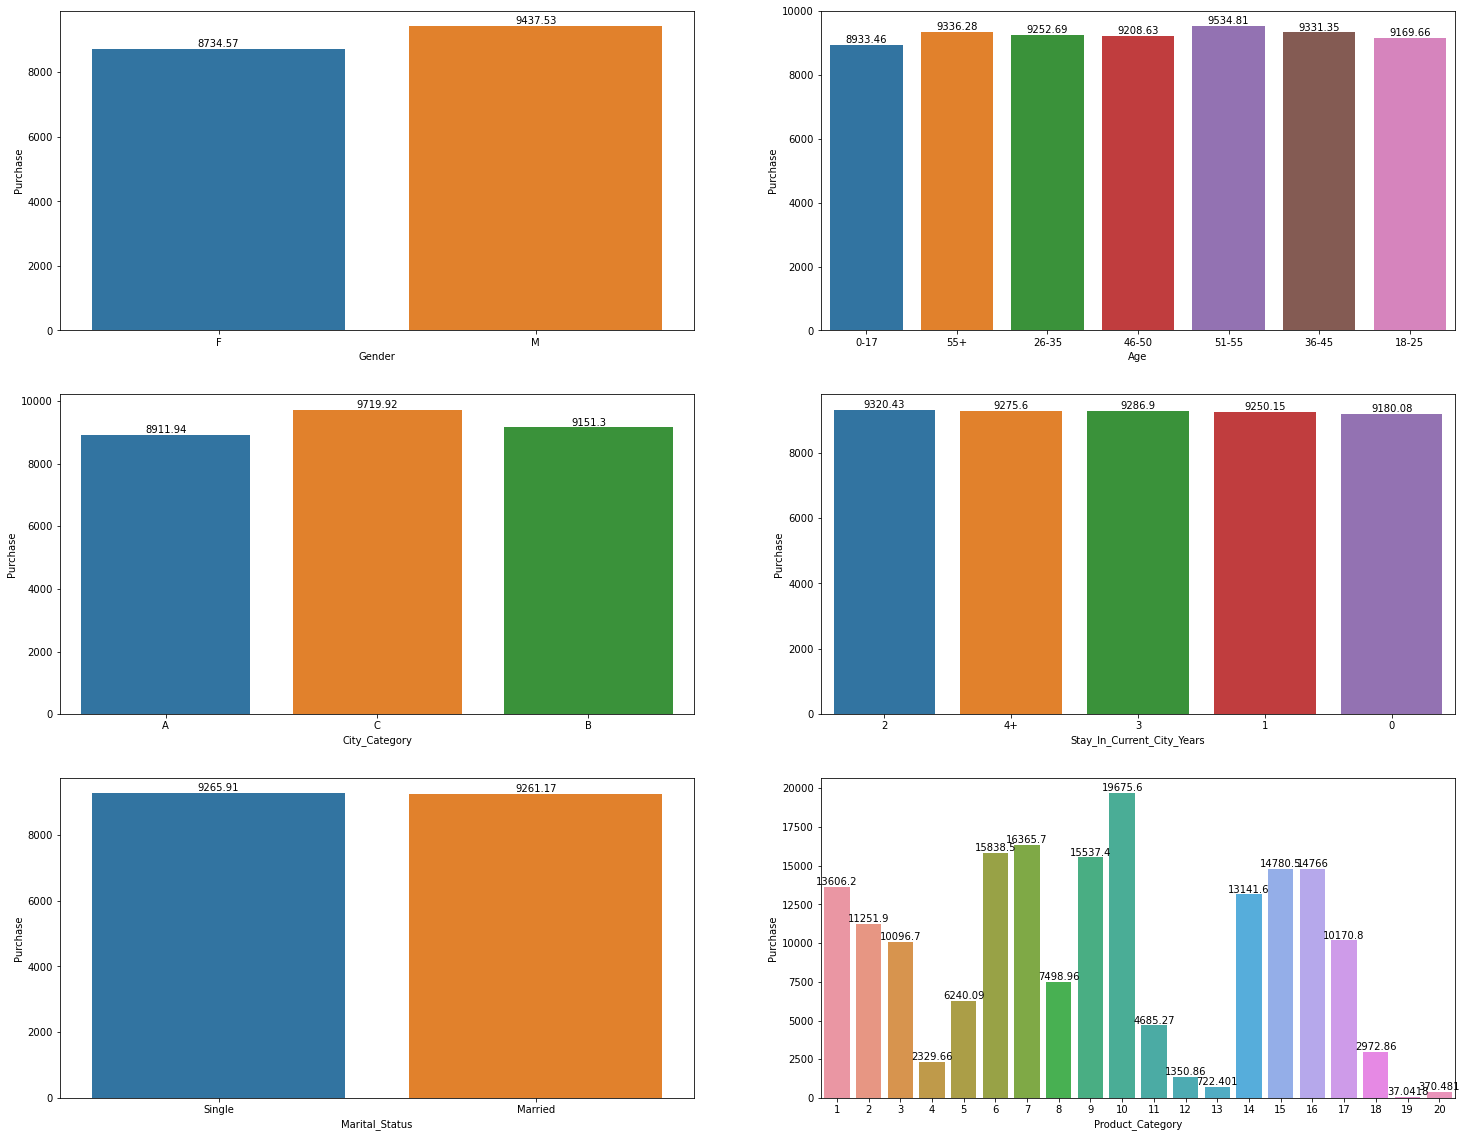

In [31]:
Fig, Axes = plt.subplots(nrows=3, ncols=2, figsize=(25,20))
col = ['Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years','Marital_Status','Product_Category']
k = 0
for i in range(3):
    for j in range(2):
        ax = sns.barplot(data=df, x = col[k], y= 'Purchase', ax = Axes[i,j], ci= None)
        ax.bar_label(ax.containers[0])
        k +=1 
plt.show()

#### 1) Average purchase amount of male customers is higher than female customers
#### 2) Average spend by customers with 51+ years age is higher than other age groups
#### 3) Average spend by customers living in city category C higher than A and B
#### 4) Average spend on product category 10 is higher than other categories

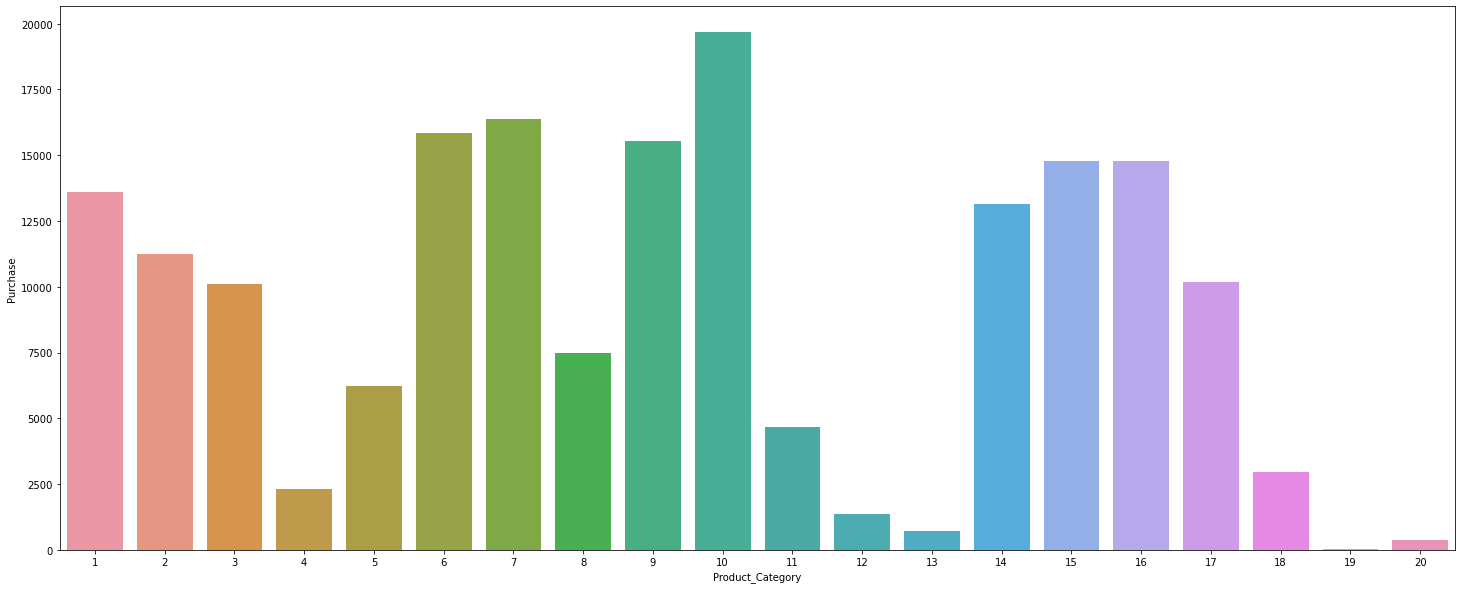

In [32]:
plt.figure(figsize = (25,10))
sns.barplot(data=df, x = 'Product_Category', y= 'Purchase', ci= None)
plt.show()

##### Amount spend on product category 10 is higher than other categories while avg amount spend on product category 19 is lowest

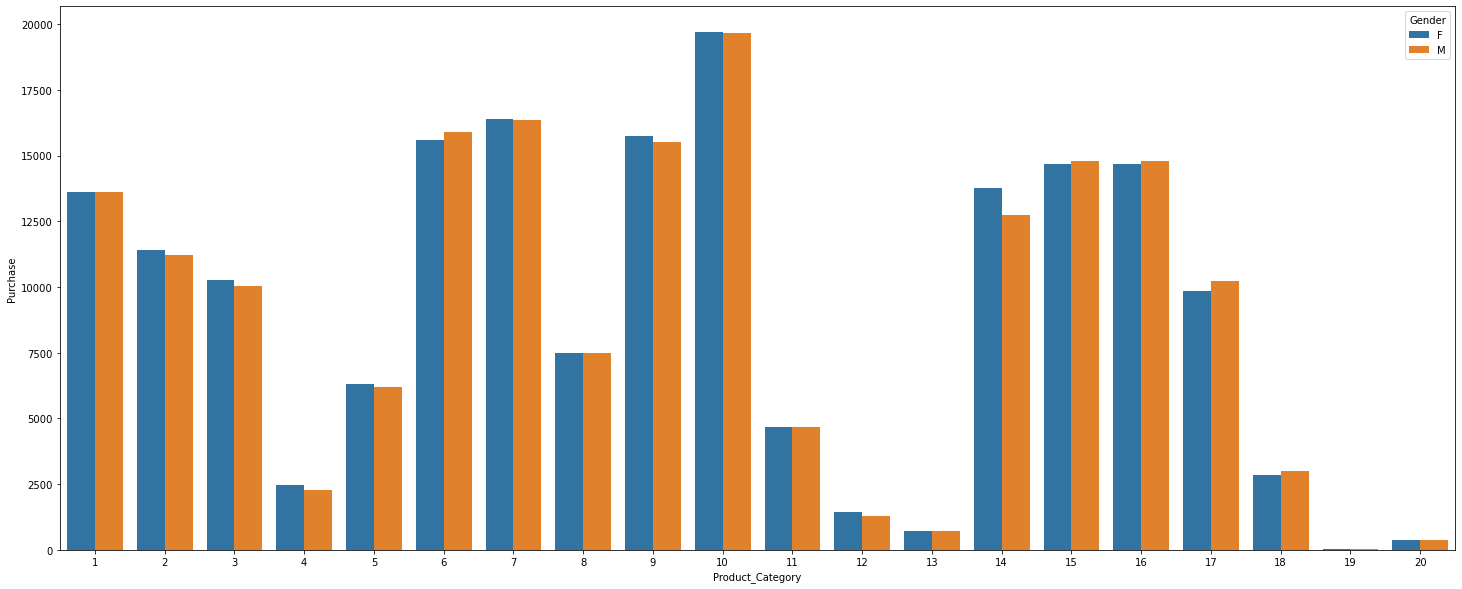

In [33]:
plt.figure(figsize = (25,10))
sns.barplot(data=df, x = 'Product_Category', y= 'Purchase', hue= 'Gender', ci= None)
plt.show()

##### There are product categories like 2, 3, 4 and 14 where female customers spend more avg amount then male customers while avg amount spend on product category 10 is almost equal for both male and female customers and higher than any other categories

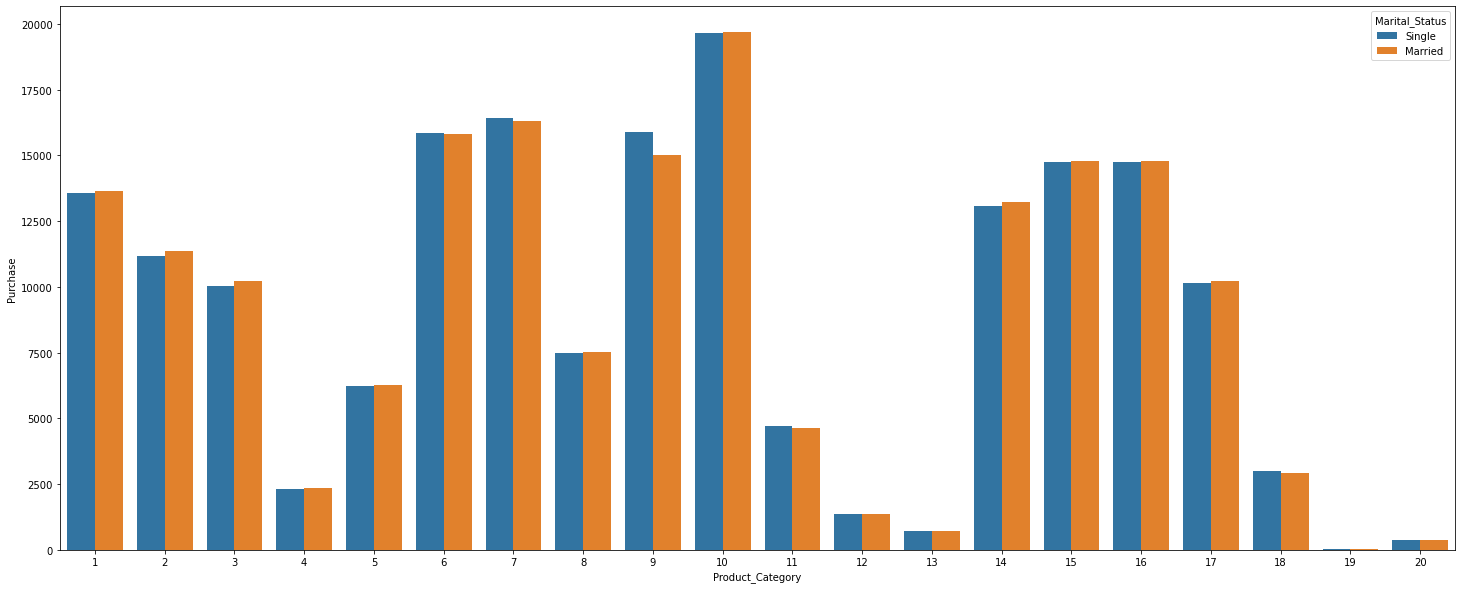

In [34]:
plt.figure(figsize = (25,10))
sns.barplot(data=df, x = 'Product_Category', y= 'Purchase', hue= 'Marital_Status', ci= None)
plt.show()

#### Married and single customers spend highest amount on product category 10 as well

### Average amount spend per customer for male and female 

In [35]:
df_gender = df.groupby(['User_ID','Gender'])['Purchase'].sum()
df_gender = df_gender.reset_index()

In [36]:
df_gender.head()

,User_ID,Gender,Purchase
0,1000001,F,334093
1,1000002,M,810472
2,1000003,M,341635
3,1000004,M,206468
4,1000005,M,821001


In [37]:
avg_male = df_gender[df_gender['Gender']=='M']['Purchase'].mean()
avg_female = df_gender[df_gender['Gender']=='F']['Purchase'].mean()
print(f'The Average purchase amount by Male customers : {round(avg_male,2)}')
print(f'The Average purchase amount by Female customers : {round(avg_female,2)}')

The Average purchase amount by Male customers : 925344.4
The Average purchase amount by Female customers : 712024.39


#### Average spend by male customers are higher than female customers

In [38]:
df_gender['Gender'].value_counts()

M    4225
F    1666
Name: Gender, dtype: int64

### CLT analysis and computing confidence intervals for male and female

In [39]:
sample_size_male, sample_size_female = 3000, 1200
itr = 1000
df_male = df_gender[df_gender['Gender']== 'M']
df_female = df_gender[df_gender['Gender']== 'F']
mean_males = []
mean_females = []
for i in range(itr):
    mean_male = df_male.sample(sample_size_male)['Purchase'].mean()
    mean_female = df_female.sample(sample_size_female)['Purchase'].mean()
    mean_males.append(mean_male)
    mean_females.append(mean_female)

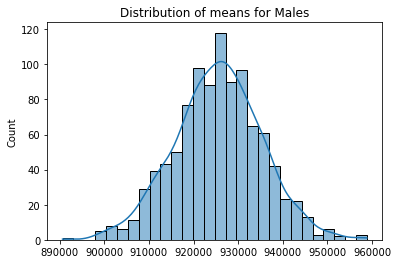

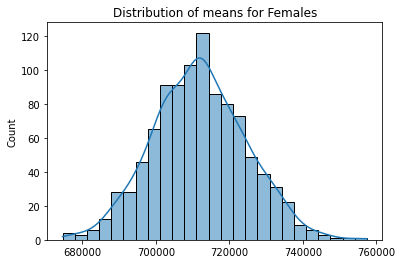

In [40]:
sns.histplot(mean_males, kde= True)
plt.title('Distribution of means for Males')
plt.show()
sns.histplot(mean_females, kde= True)
plt.title('Distribution of means for Females')
plt.show()

#### We can see both distributions are very close to normal distrubution

In [41]:
#Calculating std and mean for males and females
sigma_male = df_male['Purchase'].std() 
sigma_female = df_female['Purchase'].std()
mu_male = df_male['Purchase'].mean()
mu_female = df_female['Purchase'].mean()
n_male = len(df_male)
n_female = len(df_female)

In [42]:
# Crearting function for calculating confidence interval
def confidence_interval(confidence):
    male_lower_end = round(mu_male - (np.abs(round(norm.ppf((1-confidence)/2),2))*sigma_male/np.sqrt(n_male)),2)
    male_upper_end = round(mu_male + (np.abs(round(norm.ppf((1-confidence)/2),2))*sigma_male/np.sqrt(n_male)),2)

    female_lower_end = round(mu_female - (np.abs(round(norm.ppf((1-confidence)/2),2))*sigma_female/np.sqrt(n_female)),2)
    female_upper_end = round(mu_female + (np.abs(round(norm.ppf((1-confidence)/2),2))*sigma_female/np.sqrt(n_female)),2)

    print(f'{confidence*100}% Confidence interval for Males: ({male_lower_end}, {male_upper_end})')
    print(f'{confidence*100}% Confidence interval for Females: ({female_lower_end}, {female_upper_end})')

In [43]:
#Computing 90% confidence interval
confidence_interval(0.90)

90.0% Confidence interval for Males: (900471.15, 950217.65)
90.0% Confidence interval for Females: (679584.51, 744464.28)


In [44]:
#Computing 92% confidence interval
confidence_interval(0.92)

92.0% Confidence interval for Males: (898802.82, 951885.98)
92.0% Confidence interval for Females: (677408.66, 746640.13)


In [45]:
#Computing 95% confidence interval
confidence_interval(0.95)

95.0% Confidence interval for Males: (895617.83, 955070.97)
95.0% Confidence interval for Females: (673254.77, 750794.02)


In [46]:
#Computing 99% confidence interval
confidence_interval(0.99)

99.0% Confidence interval for Males: (886214.53, 964474.27)
99.0% Confidence interval for Females: (660990.91, 763057.88)


#### We can observe here that the confidence interval size increases as confidence level increases

### 

### Same activity for Married and Single

In [47]:
df_status = df.groupby(['User_ID','Marital_Status'])['Purchase'].sum()
df_status = df_status.reset_index()

In [48]:
df_status.head()

,User_ID,Marital_Status,Purchase
0,1000001,Single,334093
1,1000002,Single,810472
2,1000003,Single,341635
3,1000004,Married,206468
4,1000005,Married,821001


In [49]:
avg_married = df_status[df_status['Marital_Status']=='Married']['Purchase'].mean()
avg_single = df_status[df_status['Marital_Status']=='Single']['Purchase'].mean()
print(f'The Average purchase amount by Single customers : {round(avg_single,2)}')
print(f'The Average purchase amount by Married customers : {round(avg_married,2)}')

The Average purchase amount by Single customers : 880575.78
The Average purchase amount by Married customers : 843526.8


#### Average spend by single customers are higher than married customers

In [50]:
df_status['Marital_Status'].value_counts()

Single     3417
Married    2474
Name: Marital_Status, dtype: int64

In [51]:
sample_size_single, sample_size_married = 2500, 1500
itr = 1000
df_single = df_status[df_status['Marital_Status']== 'Single']
df_married = df_status[df_status['Marital_Status']== 'Married']
mean_singles = []
mean_married = []
for i in range(itr):
    mean_single = df_single.sample(sample_size_single)['Purchase'].mean()
    mean_marr = df_married.sample(sample_size_married)['Purchase'].mean()
    mean_singles.append(mean_single)
    mean_married.append(mean_marr)

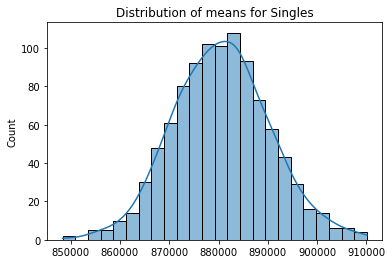

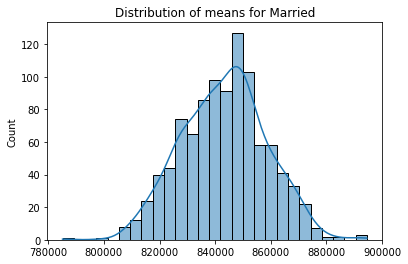

In [52]:
sns.histplot(mean_singles, kde= True)
plt.title('Distribution of means for Singles')
plt.show()
sns.histplot(mean_married, kde= True)
plt.title('Distribution of means for Married')
plt.show()

#### We can see both distributions are very close to normal distrubution

In [53]:
#Calculating std and mean for males and females
sigma_single = df_single['Purchase'].std() 
sigma_married = df_married['Purchase'].std()
mu_single = df_single['Purchase'].mean() 
mu_married = df_married['Purchase'].mean()  
n_single = len(df_single)
n_married = len(df_married)

In [54]:
# Crearting function for calculating confidence interval
def confidence_interval_for_maritalstatus(confidence):
    single_lower_end = round(mu_single - (np.abs(round(norm.ppf((1-confidence)/2),2))*sigma_single/np.sqrt(n_single)),2)
    single_upper_end = round(mu_single + (np.abs(round(norm.ppf((1-confidence)/2),2))*sigma_single/np.sqrt(n_single)),2)

    married_lower_end = round(mu_married - (np.abs(round(norm.ppf((1-confidence)/2),2))*sigma_married/np.sqrt(n_married)),2)
    married_upper_end = round(mu_married + (np.abs(round(norm.ppf((1-confidence)/2),2))*sigma_married/np.sqrt(n_married)),2)

    print(f'{confidence*100}% Confidence interval for Singles: ({single_lower_end}, {single_upper_end})')
    print(f'{confidence*100}% Confidence interval for Married: ({married_lower_end}, {married_upper_end})')

In [55]:
#Computing 90% confidence interval
confidence_interval_for_maritalstatus(0.90)

90.0% Confidence interval for Singles: (853938.67, 907212.9)
90.0% Confidence interval for Married: (812686.46, 874367.13)


In [56]:
#Computing 92% confidence interval
confidence_interval_for_maritalstatus(0.92)

92.0% Confidence interval for Singles: (852152.03, 908999.53)
92.0% Confidence interval for Married: (810617.9, 876435.69)


In [57]:
#Computing 95% confidence interval
confidence_interval_for_maritalstatus(0.95)

95.0% Confidence interval for Singles: (848741.18, 912410.38)
95.0% Confidence interval for Married: (806668.83, 880384.76)


In [58]:
#Computing 99% confidence interval
confidence_interval_for_maritalstatus(0.99)

99.0% Confidence interval for Singles: (838671.05, 922480.51)
99.0% Confidence interval for Married: (795009.68, 892043.91)


### Same activity for Age

In [59]:
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [60]:
# We are taking bins based on life stages: 0-17, 18-25, 26-35, 36-50, 51+ years so we have to make changes in existing bins 
# of dataset 
df['Age']= df['Age'].apply(lambda x: '36-50' if x=='36-45' or x=='46-50' else('51+' if x=='51-55' or x=='55+' else x))

In [61]:
df['Age'].unique()

array(['0-17', '51+', '26-35', '36-50', '18-25'], dtype=object)

In [62]:
df_age = df.groupby(['User_ID','Age'])['Purchase'].sum()
df_age = df_age.reset_index()

In [63]:
bins = ['0-17', '18-25','26-35', '36-50', '51+']
for i in bins:
    avg = df_age[df_age['Age']==i]['Purchase'].mean()
    print(f'The Average purchase amount by customers between the age {i} is : {round(avg,2)}')

The Average purchase amount by customers between the age 0-17 is : 618867.81
The Average purchase amount by customers between the age 18-25 is : 854863.12
The Average purchase amount by customers between the age 26-35 is : 989659.32
The Average purchase amount by customers between the age 36-50 is : 852422.43
The Average purchase amount by customers between the age 51+ is : 665729.21


In [64]:
df_age['Age'].value_counts()

26-35    2053
36-50    1698
18-25    1069
51+       853
0-17      218
Name: Age, dtype: int64

In [65]:
sample_size = [150, 500, 1500, 1000, 400]
itr = 800
sample_means_of_age = [[] for _ in range(5)]
for i in range(len(bins)):
    for j in range(itr):
        sample_mean_age = df_age[df_age['Age']== bins[i]].sample(sample_size[i])['Purchase'].mean()
        sample_means_of_age[i].append(sample_mean_age)

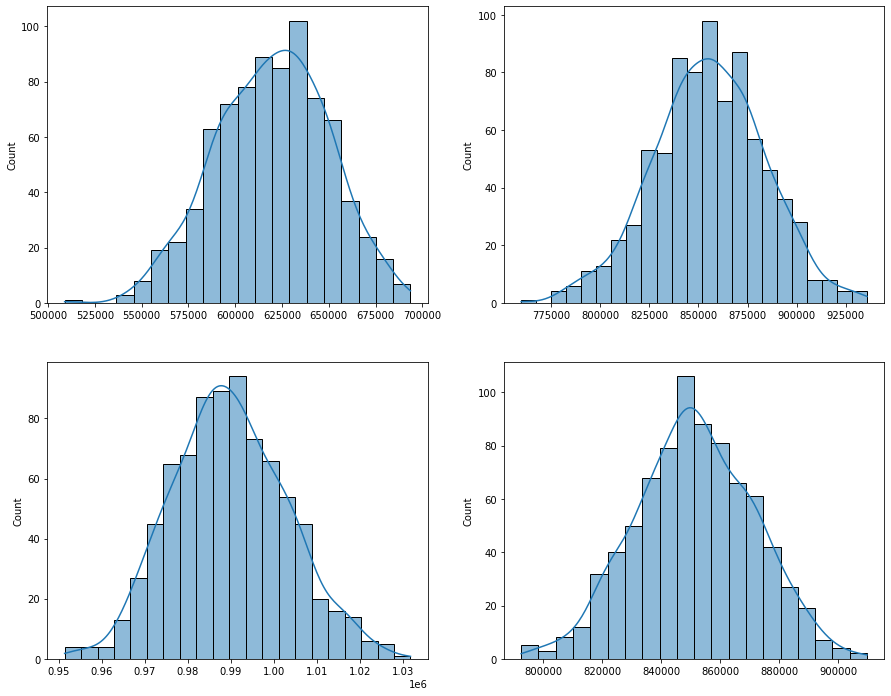

In [66]:
Fig, Axes = plt.subplots(nrows = 2, ncols = 2, figsize = (15,12))
k = 0
for i in range(2):
    for j in range(2):
        sns.histplot(sample_means_of_age[k],  ax=Axes[i,j], kde = True)
        k += 1
plt.show()

In [67]:
def confidence_interval_for_age(confidence):
    for i in bins:
        df_bin = df_age[df_age['Age']==i]
        lower_end = round(df_bin['Purchase'].mean() - (np.abs(round(norm.ppf((1-confidence)/2),2))*df_bin['Purchase'].std()/np.sqrt(len(df_bin))),2)
        upper_end = round(df_bin['Purchase'].mean() + (np.abs(round(norm.ppf((1-confidence)/2),2))*df_bin['Purchase'].std()/np.sqrt(len(df_bin))),2)

        print(f'{confidence*100}% Confidence interval for age {i} years: ({lower_end}, {upper_end})')
       

In [68]:
#Computing 90% confidence interval
confidence_interval_for_age(0.90)

90.0% Confidence interval for age 0-17 years: (542553.13, 695182.5)
90.0% Confidence interval for age 18-25 years: (810323.44, 899402.8)
90.0% Confidence interval for age 26-35 years: (952320.12, 1026998.51)
90.0% Confidence interval for age 36-50 years: (813972.08, 890872.78)
90.0% Confidence interval for age 51+ years: (624772.43, 706686.0)


In [69]:
#Computing 92% confidence interval
confidence_interval_for_age(0.92)

92.0% Confidence interval for age 0-17 years: (537434.46, 700301.16)
92.0% Confidence interval for age 18-25 years: (807336.03, 902390.21)
92.0% Confidence interval for age 26-35 years: (949815.66, 1029502.97)
92.0% Confidence interval for age 36-50 years: (811393.1, 893451.77)
92.0% Confidence interval for age 51+ years: (622025.33, 709433.1)


In [70]:
#Computing 95% confidence interval
confidence_interval_for_age(0.95)

95.0% Confidence interval for age 0-17 years: (527662.46, 710073.17)
95.0% Confidence interval for age 18-25 years: (801632.78, 908093.46)
95.0% Confidence interval for age 26-35 years: (945034.42, 1034284.21)
95.0% Confidence interval for age 36-50 years: (806469.58, 898375.29)
95.0% Confidence interval for age 51+ years: (616780.86, 714677.56)


In [71]:
#Computing 99% confidence interval
confidence_interval_for_age(0.99)

99.0% Confidence interval for age 0-17 years: (498811.78, 738923.84)
99.0% Confidence interval for age 18-25 years: (784794.6, 924931.63)
99.0% Confidence interval for age 26-35 years: (930918.39, 1048400.25)
99.0% Confidence interval for age 36-50 years: (791933.47, 912911.39)
99.0% Confidence interval for age 51+ years: (601297.2, 730161.23)
